## Введение в машинное обучение

### Домашнее задание №1

Задание выполнил(а): Лунева Полина

В данном домашнем задании используются библиотеки numpy, pandas и matplotlib

## Часть 1. Numpy

In [24]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [70]:
def result_mark(weights, marks):
    return round(np.sum(weights * marks))

In [91]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])
result_mark(weights, marks)

8

### 2

Напишите функцию, меняющую все каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [62]:
def change_array(array, number):
    array[::3] = number
    return array

In [63]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
change_array(array, number)

array([-111,    5,    1, -111,   -3,   22, -111])

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [64]:
def find_close(array1, array2, precision):
    return np.where(np.abs(array1 - array2) <= precision)[0]

In [65]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4, 3, 0, -1.2])
precision = 0.5
find_close(array1, array2, precision)

array([0, 1, 3, 6], dtype=int64)

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [38]:
def block_matrix(block):
    return np.vstack((np.hstack((block, block)), np.hstack((block, block))))

In [39]:
block = np.array([[0, 1, 2], [3, 4, 5]])
block_matrix(block)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

In [54]:
def diag_prod(matrix):
    diag = np.diag(matrix)[np.diag(matrix) != 0]
    return np.prod(diag)
    

In [55]:
matrix = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
diag_prod(matrix)

32

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [66]:
def normalize(matrix):
    return np.around((matrix - np.mean(matrix, axis=0))/(np.std(matrix, axis=0) + 0.0000000000000000000000001), 2)

In [67]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
normalize(matrix)

array([[ 0.71, -0.39,  0.46],
       [-1.41,  1.37,  0.93],
       [ 0.71, -0.98, -1.39]])

In [79]:
# Второй вариант (без добавления маленького числа, ведущего к погрешности)

def normalize(matrix):
    matrix = matrix.astype(float)
    std = np.std(matrix, axis=0)
    std[std == 0] = 1
    matrix -= np.mean(matrix, axis=0)
    return np.around(matrix /std, 2)

In [80]:
# Проверка деления на ноль

matrix = np.array([[1, 4, 4200], [1, 10, 5000], [1, 2, 1000]])
normalize(matrix)

array([[ 0.  , -0.39,  0.46],
       [ 0.  ,  1.37,  0.93],
       [ 0.  , -0.98, -1.39]])

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите ваше любимое число). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [81]:
def antiderivative(coefs):
    return np.append(coefs / np.arange(len(coefs), 0, -1), 0)

In [82]:
coefs = np.array([4, 6, 0, 1])
antiderivative(coefs)

array([1., 2., 0., 1., 0.])

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [26]:
def make_symmetric(matrix):
    return matrix + np.transpose(matrix) - np.diag(np.diag(matrix))

In [84]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
make_symmetric(matrix)

array([[ 1,  2,  3,  4],
       [ 2,  5,  6,  7],
       [ 3,  6,  8,  9],
       [ 4,  7,  9, 10]])

In [28]:
# Проверка для нижнетругольной матрицы с отрицательными числами

matrix = np.array([[-1, 0, 0, 0], [2, -5, 0, 0], [3, -6, -8, 0], [4, -7, 9, -10]])
make_symmetric(matrix)

array([[ -1,   2,   3,   4],
       [  2,  -5,  -6,  -7],
       [  3,  -6,  -8,   9],
       [  4,  -7,   9, -10]])

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [35]:
def construct_matrix(m, a, b):
    return np.array([np.arange(a, b + 1)] * m)

# Альтернатива:
# def construct_matrix(m, a, b):
#    return np.tile(np.arange(a, b + 1), (m,1))

In [36]:
m = 5
a = 3
b = 10
construct_matrix(m, a, b)

array([[ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10]])

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [88]:
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))


In [89]:
vec1 = np.array([-2, 1, 0, -5, 4, 3, -3])
vec2 = np.array([0, 2, -2, 10, 6, 0, 0])
cosine_similarity(vec1, vec2)

-0.25

## Часть 2. Pandas и Matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5, последние 5 строк и размер.

In [2]:
# Чтение данных из файла
# Если бы данные и ноутбук находились в разных папках, то нужно было бы прописать путь к к файлу
# В данном файле разделителем является запятая

data = pd.read_csv('train.csv', delimiter=',')

In [73]:
# Первые 5 строк
# Если не указывать количество строк, то оно равно 5

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Последние 5 строк
# Если не указывать количество строк, то оно равно 5

data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# Размер

print('Размер таблицы:', data.shape)

Размер таблицы: (891, 12)


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, бинарный, другое) Объясните, почему вы так считаете. Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

In [ ]:
Типы признаков:
    PassengerId - вещественный (номера пассажиров, идущие подряд, начиная с единицы; они измеряются в целых числах)
    Survived - бинарный (подвид категориального признака, где есть только две опции: 0 (не выжил) и 1 (выжил))
    Pclass - порядковый (три опции (первый, второй и третий класс), которые можно сравнивать (первый класс считается лучшим))
    Name - другое (тип строковый; в основном уникальные значения, хотя бывают и исключения)
    Sex - бинарный (подвид категориального признака, где есть только две опции: male (мужчина) и female (женщина))
    Age - вещественный (числа обозначают возраст пассажиров, который измеряется в числах; нецелочисленный тип (.0))
#       - порядковый (также возраст можно сравнивать, поэтому в некоторых случаях его можно отнести к порядковому признаку)
    SibSp - вещественный (количество братьев, сестер, супругов, которое измеряется в целых числах)
    Parch - вещественный (количество родителей, детей, которое измеряется в целых числах)
    Ticket - другое (тип строковый, включающий как буквы, так и цифры)
    Fare - вещественный (плата, которая измеряется в дробных числах)
    Cabin - категориальный (ограниченное число кают, которые могут повторяться для разных пассажиров)
#         - другое (тип строковый, включающий как буквы, так и цифры; не является уникальным, так как несколько пассажиров могут жить в одной каюте)
    Embarked - категориальный (три опции порта посадки (Cherbourg, Queenstown, Southampton), которые нельзя сравнить)
    
Задачи:
    1. Задача регрессии: предсказать возраст пассажира на основе количества у него родственников на борту(братьев, сестер и мужей; родителей и детей) (трехмерное пространство) (целевая переменная: Age)
                       : предсказать плату за билет пассажира на основе его возраста (двумерное пространство) или на основе всех признаков, кроме PassengerId, Name, Ticket (целевая перенная: Fare)
                       
    2. Задача классификации: отнести пассажира к классу билета на основе его возраста, стоимости билета и порта посадки (целевая переменная: Pclass)
                           : отнести пассажира к выжившему/погибшему (целевая перенная: Survived)
    3. Задача кластеризации: разделить пассажиров на клаcтеры (группы) на основе возраста, платы за билет и количества родителей и детей на борту
                           : разделить пассажиров на кластеры (группы) на основе возраста и платы за билет
                           : разделить пассажиров на кластеры на основе имеющихся данных (вряд ли стоит учитывать PassengerId, Name, Ticket)


### 13

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [117]:
# Есть ли в данных пропуски

pd.isnull(data).any().any()

# Альтернативная запись: data.isnull().any().any()

# Да

True

In [16]:
# В каких столбцах и сколько пропусков

pd.isnull(data).sum()

# Альтернативная запись: data.isnull().sum()

# Age - 177 пропусков
# Cabin - 687 пропусков
# Embarked - 2 пропуска

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [144]:
# Вывод только столбцов с пропусками

data.isnull().sum()[data.isnull().sum() != 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [164]:
print ('Пропусков в столбце "Age":', pd.isnull(data['Age']).sum())
print ('Пропусков в столбце "Cabin":', pd.isnull(data['Cabin']).sum())
print ('Пропусков в столбце "Embarked":', pd.isnull(data['Embarked']).sum())

Пропусков в столбце "Age": 177
Пропусков в столбце "Cabin": 687
Пропусков в столбце "Embarked": 2


In [137]:
# Проверка скрытых пропусков (например, "unknown") в некоторых столбцах (где данные повторяются и количество вариантов небольшое, чтобы было удобно смотреть)

data['Survived'].value_counts()

# Нет

0    549
1    342
Name: Survived, dtype: int64

In [130]:
data['Pclass'].value_counts()

# Нет

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [131]:
data['Sex'].value_counts()

# Нет

male      577
female    314
Name: Sex, dtype: int64

In [132]:
data['SibSp'].value_counts()

# Нет

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [133]:
data['Parch'].value_counts()

# Нет

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [141]:
data['Embarked'].value_counts()

# Нет

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### 14

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [3]:
# Замена пропусков в столбце "Age" на медианное значение (28.0)

data['Age'].fillna(data['Age'].median(), inplace=True)


In [4]:
# Замена пропусков в столбце "Cabin" на "Unknown", так как слишком много пропусков (687), поэтому замена на самое частое значение исказит результаты анализа

data['Cabin'].fillna('Unknown', inplace=True)

In [5]:
# Замена пропусков в столбце "Embarked" на самое частое значение ("S"), так как пропуска всего 2

data['Embarked'].fillna('S', inplace=True)

# Альтернатива: data['Embarked'].fillna(data['Embarked'].value_counts().keys()[0], inplace=True)
# Замена на data['Embarked'].value_counts().keys()[0], так как value_counts().keys() показывает названия встречающихся данных в столбце, отсортированных по убаванию частоты появления

In [6]:
# Проверка, что все пропуски заполнены

pd.isnull(data).any().any()

False

### 15

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [137]:
# Доли погибших и выживших пассажиров

data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [97]:
# Доля выживших пассажиров

print('Доля выживших пассажиров:', data['Survived'].value_counts(normalize=True)[data['Survived'] == 1].tolist()[0])

# Альтернатива: print('Доля выживших пассажиров:', data['Survived'].value_counts(normalize=True)[1])
# Можно использовать индекс 1, так как по результатам предыдущего шага видно, что данный индекс у доли выживших

Доля выживших пассажиров: 0.3838383838383838


In [4]:
# Доли женщин и мужчин среди выживших пассажиров

data['Sex'].where(data['Survived'] == 1).value_counts(normalize=True)

# Доля женщин: 0.681287
# Доля мужчин: 0.318713

female    0.681287
male      0.318713
Name: Sex, dtype: float64

In [171]:
print('Доля выживших мужчин:', data['Sex'].where(data['Survived'] == 1).value_counts(normalize=True).tolist()[1])
print('Доля выживших женщин:', data['Sex'].where(data['Survived'] == 1).value_counts(normalize=True).tolist()[0])

Доля выживших мужчин: 0.31871345029239767
Доля выживших женщин: 0.6812865497076024


In [175]:
# Также можно посчитать доли с помоью математической формулы

print('Доля выживших мужчин:', data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Survived'].count()/data[data['Survived'] == 1]['Survived'].count())
print('Доля выживших женщин:', data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Survived'].count()/data[data['Survived'] == 1]['Survived'].count())

Доля выживших мужчин: 0.31871345029239767
Доля выживших женщин: 0.6812865497076024


### 16

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [29]:
# Сколько пассажиров ехало в каждом классе

data['Pclass'].value_counts()

# 1 класс - 216 пассажиров
# 2 класс - 184 пассажиров
# 3 класс - 491 пассажиров

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [157]:
print('Количество пассажиров в 1 классе:', data['Pclass'].value_counts()[data['Pclass'].value_counts().keys() == 1].tolist()[0])
print('Количество пассажиров во 2 классе:', data['Pclass'].value_counts()[data['Pclass'].value_counts().keys() == 2].tolist()[0])
print('Количество пассажиров в 3 классе:', data['Pclass'].value_counts()[data['Pclass'].value_counts().keys() == 3].tolist()[0])

Количество пассажиров в 1 классе: 216
Количество пассажиров во 2 классе: 184
Количество пассажиров в 3 классе: 491


In [57]:
# Кого было больше в самом многолюдном классе

data[data['Pclass'] == data['Pclass'].value_counts().keys()[0]]['Sex'].value_counts()

# Мужчин (347)

male      347
female    144
Name: Sex, dtype: int64

In [60]:
# Вывод только пола

data[data['Pclass'] == data['Pclass'].value_counts().keys()[0]]['Sex'].value_counts().keys()[0]

# Альтернатива (для удобного чтения): data['Pclass'] == data['Pclass'].value_counts().keys()[0] можно заменить переменной
# max_pclass = data['Pclass'] == data['Pclass'].value_counts().keys()[0]
# data[max_pclass]['Sex'].value_counts().keys()[0]

# Альтернатива: можно использовать функцию idxmax()
# data[data['Pclass'] == data['Pclass'].value_counts().idxmax()]['Sex'].value_counts().idxmax()

'male'

### 17

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [129]:
# Минимальная, средняя и максимальная сумма, которую заплатили пассажиры за проезд

data["Fare"].describe()[["min", "mean", "max"]]

min       0.000000
mean     32.204208
max     512.329200
Name: Fare, dtype: float64

In [160]:
print('Минимальная сумма, которую пассажиры заплатили за проезд:', data['Fare'].min())
print('Средняя сумма, которую пассажиры заплатили за проезд:', data['Fare'].mean())
print('Максимальная сумма, которую пассажиры заплатили за проезд:', data['Fare'].max())

Минимальная сумма, которую пассажиры заплатили за проезд: 0.0
Средняя сумма, которую пассажиры заплатили за проезд: 32.2042079685746
Максимальная сумма, которую пассажиры заплатили за проезд: 512.3292


In [127]:
# Также можно найти медианное значение платы за проезд

data['Fare'].median()

14.4542

In [22]:
# Минимальная, средняя и максимальная сумма, которую заплатили за проезд пассажиры, севшие на корабль в Саутгемптоне

data["Fare"].where(data['Embarked'] == 'S').describe()[["min", "mean", "max"]]

min       0.000000
mean     27.243651
max     263.000000
Name: Fare, dtype: float64

In [161]:
print('Минимальная сумма, которую пассажиры заплатили за проезд из Саутгемптона:', data['Fare'].where(data['Embarked'] == 'S').min())
print('Средняя сумма, которую пассажиры заплатили за проезд из Саутгемптона:', data['Fare'].where(data['Embarked'] == 'S').mean())
print('Максимальная сумма, которую пассажиры заплатили за проезд из Саутгемптона:', data['Fare'].where(data['Embarked'] == 'S').max())

Минимальная сумма, которую пассажиры заплатили за проезд из Саутгемптона: 0.0
Средняя сумма, которую пассажиры заплатили за проезд из Саутгемптона: 27.243651393188795
Максимальная сумма, которую пассажиры заплатили за проезд из Саутгемптона: 263.0


In [119]:
# Также можно найти медианное значение платы за проезд из Саутгемптона

data['Fare'].where(data['Embarked'] == 'S').median()

13.0

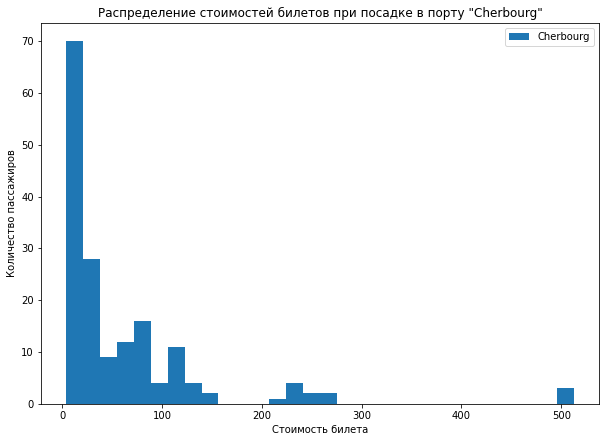

In [226]:
# Гистограмма, показывающая распределение стоимостей билетов при посадке в "Cherbourg"

plt.figure(figsize=(10,7))
plt.title('Распределение стоимостей билетов при посадке в порту "Cherbourg"')
plt.hist(data[data['Embarked'] == 'C']['Fare'], bins=30)
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.legend(['Cherbourg'])
plt.show()

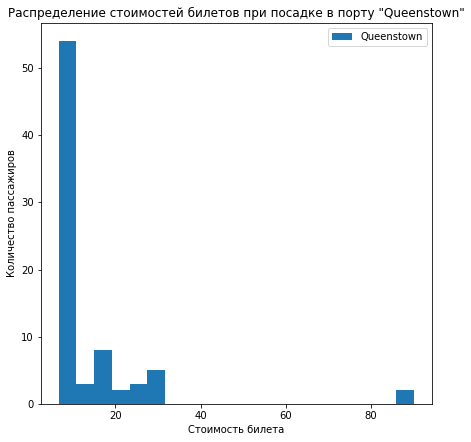

In [227]:
# Гистограмма, показывающая распределение стоимостей билетов при посадке в "Queenstown"

plt.figure(figsize=(7,7))
plt.title('Распределение стоимостей билетов при посадке в порту "Queenstown"')
plt.hist(data[data['Embarked'] == 'Q']['Fare'], bins=20)
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.legend(['Queenstown'])
plt.show()

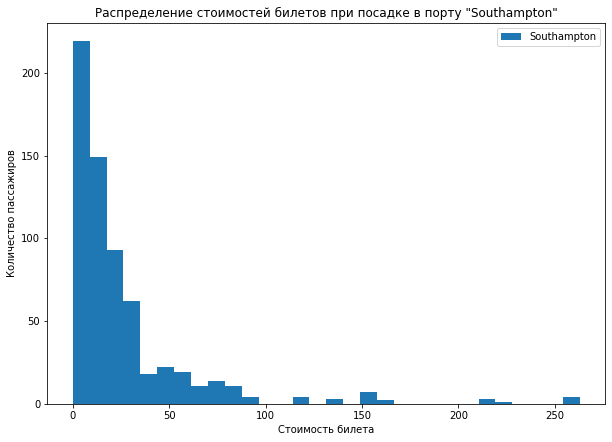

In [229]:
# Гистограмма, показывающая распределение стоимостей билетов при посадке в "Southampton"

plt.figure(figsize=(10,7))
plt.title('Распределение стоимостей билетов при посадке в порту "Southampton"')
plt.hist(data[data['Embarked'] == 'S']['Fare'], bins=30)
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.legend(['Southampton'])
plt.show()

In [ ]:
# Большая часть пассажиров купила более дешевые билеты

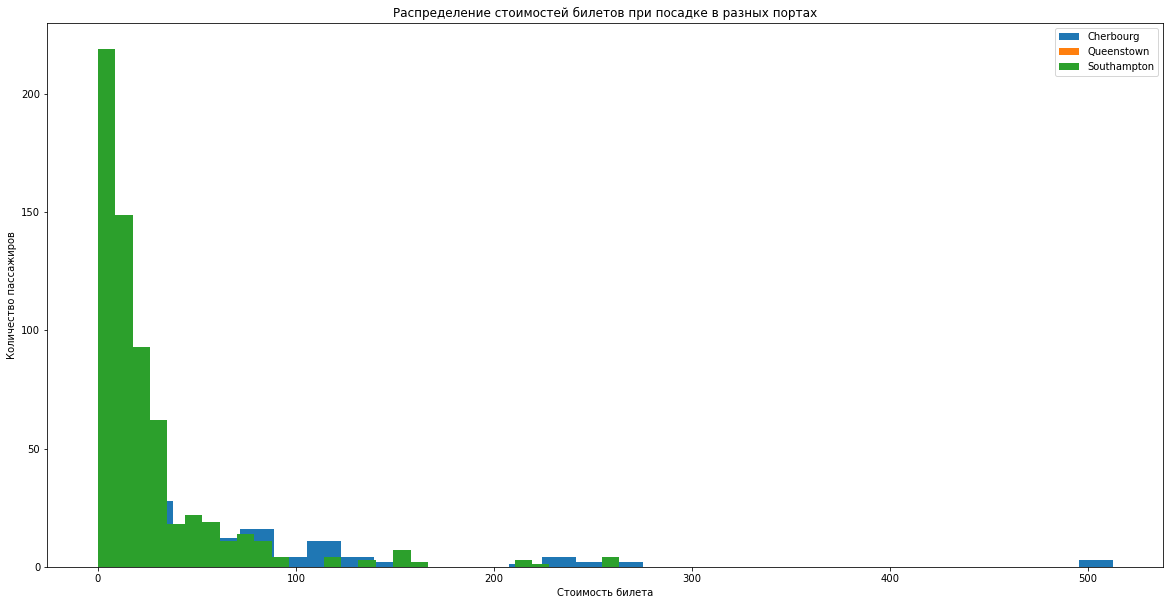

In [252]:
# Объединенные гистограммы


plt.figure(figsize=(20,10))
plt.title('Распределение стоимостей билетов при посадке в разных портах')
plt.hist(data[data['Embarked'] == 'C']['Fare'], bins=30)
plt.hist(data[data['Embarked'] == 'Q']['Fare'], bins=30)
plt.hist(data[data['Embarked'] == 'S']['Fare'], bins=30)
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.legend(['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()

### 18

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [ ]:
# Данный пункт нужно выполнять после 22 номера, так как для анализа я использую не очень полезные признаки (чтобы сделать задачи более сложными и отличными от тех, которые нам предлагается решить)
# Ниже написан код, который не надо запускать! После 22 номера данный код с объяснениями продублирован и готов к запуску

# PassengerId не несет полезную информацию для анализа, однако является уникальным номером пассажиров и может быть использован для их идентификации (оставлен как технический столбец)
# Name содержит имена пассажиров, которые не важны для анализа и статистики, а для идентификации пассажиров можно использовать их номера, которые точно уникальны, в отличие от имен
# Ticket содержит номера билетов пассажиров, которые не полезны для проведения анализа (так же их слишком много, хоть они и могут повторяться)
# Cabin является категориальным признаком и мог бы быть полезным для анализа, однако имеет слишком много опций и пропусков (687 из 891 строк), поэтому результаты его анализа будут искаженными

# data = data.drop(columns=['Name', 'Ticket', 'Cabin'])
# data

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)). Разметьте на этой диаграме выживших пассажиров зеленым цветом, а не выживших - красным.

In [304]:
# Насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров

print('Корреляция цены за билет и возраста пассажиров:', data['Fare'].corr(data['Age']))

# Несильно, положительно

Корреляция цены за билет и возраста пассажиров: 0.09668842218036486


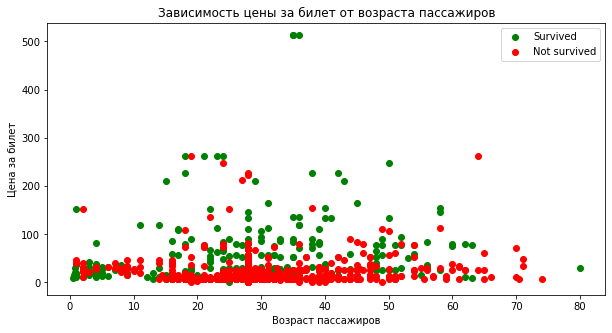

In [314]:
plt.figure(figsize=(10,5))
plt.title('Зависимость цены за билет от возраста пассажиров')
plt.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], color='green')
plt.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], color='red')
plt.xlabel('Возраст пассажиров')
plt.ylabel('Цена за билет')
plt.legend(['Survived', 'Not survived'])
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [335]:
# Зависимость выживаемости пассажиров от цены билета

print('Корреляция выживаемости пассажиров и цены за билет:', data['Survived'].corr(data['Fare']))

# Взаимосвязь есть, так как корреляция не равно 0
# Положительная корреляция показывает, что чем дороже билеты, тем чаще выживали пассажиры

Корреляция выживаемости пассажиров и цены за билет: 0.2573065223849623


In [332]:
# Средняя цена за билет погибших и выживших пассажиров показывает связь цены за билет и выживаемости

print ('Средняя цена за билет погибших пассажиров:', data[data['Survived'] == 0]['Fare'].mean())
print ('Средняя цена за билет выживших пассажиров:', data[data['Survived'] == 1]['Fare'].mean())

# Связь есть: цена за билет погибших пассажиров примерно в 2 раза меньше, чем выживших

Средняя цена за билет погибших пассажиров: 22.117886885245877
Средняя цена за билет выживших пассажиров: 48.39540760233917


In [336]:
# Зависимость выживаемости пассажиров от класса

print('Корреляция выживаемости пассажиров и класса билета:', data['Survived'].corr(data['Pclass']))

# Взаимосвязь есть, но отрицательная (чем больше номер класса, тем меньше выживших)

Корреляция выживаемости пассажиров и класса билета: -0.338481035961015


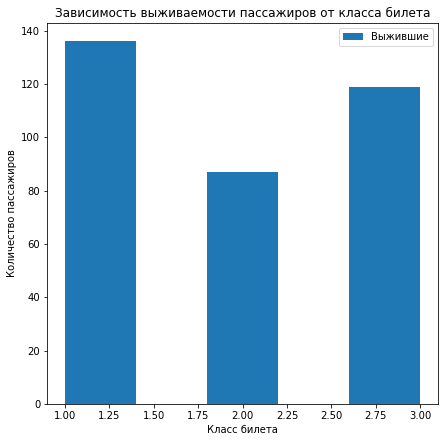

In [50]:
# Диаграмма зависимости выживаемости пассажиров от класса билета
# 1 - 1 класс, 2 - 2 класс, 3 - 3 класс

plt.figure(figsize=(7,7))
plt.title('Зависимость выживаемости пассажиров от класса билета')
plt.hist(data['Pclass'][data['Survived'] == 1], bins=5)
plt.xlabel('Класс билета')
plt.ylabel('Количество пассажиров')
plt.legend(['Выжившие'])
plt.show()

# Больше всего выживших из 1 класса

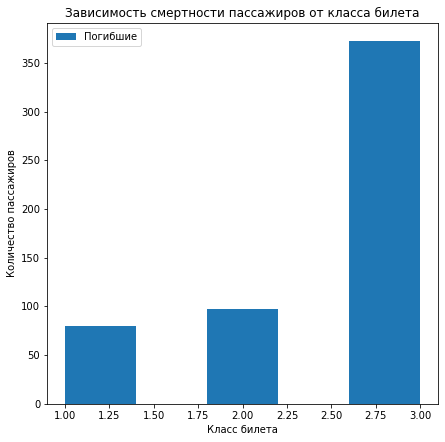

In [51]:
# Диаграмма зависимости смертности пассажиров от класса билета
# 1 - 1 класс, 2 - 2 класс, 3 - 3 класс

plt.figure(figsize=(7,7))
plt.title('Зависимость смертности пассажиров от класса билета')
plt.hist(data['Pclass'][data['Survived'] == 0], bins=5)
plt.xlabel('Класс билета')
plt.ylabel('Количество пассажиров')
plt.legend(['Погибшие'])
plt.show()

# Больше всего погибших из 3 класса, причем разница значительная

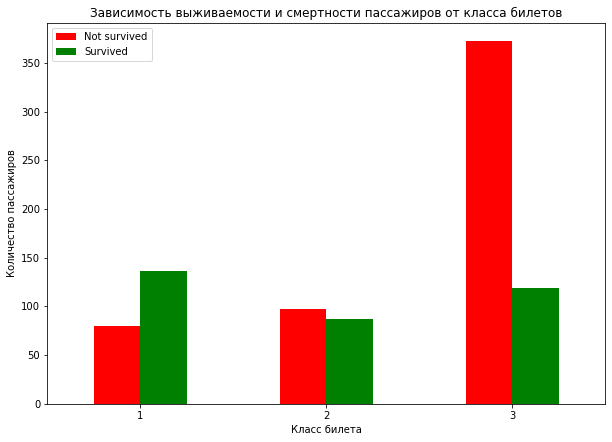

In [120]:
# График зависимости выживаемости и смертности пассажиров от класса билетов

df = data.groupby(['Pclass', 'Survived'])['Pclass'].aggregate('count').unstack().plot.bar(rot=0, figsize=(10,7), color=['red', 'green'])
plt.title("Зависимость выживаемости и смертности пассажиров от класса билетов")
plt.xlabel("Класс билета")
plt.ylabel("Количество пассажиров")
plt.legend(['Not survived', 'Survived'])
plt.show()

# В первом классе больше выживших, а в тетьем - погибших, при этом во втором разница между выжившими и пошибшими маленькая

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [7]:
# Добавление столбца, показывающего количество его родных на корабле и его самого

data['Family'] = data['SibSp'] + data['Parch'] + 1

In [8]:
# Добавление столбца с бинарным признаком (1 - большая семья (на борту), 0 - нет)
# Данный признак может быть полезен для статистики погибших и выживших семей

data['HasBigFamily'] = (data['Family'] > 3).astype(int)

In [9]:
# Добавление столбца с бинарным признаком (1 - совершеннолетний, 0 - нет)
# Данный стоолбец может быть полезен для анализа, так как в статистике часто разделяют взрослых и детей

data['IsAdult'] = (data['Age'] >= 18).astype(int)

In [139]:
# Просмотр первых 15 строк для проверки

data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,HasBigFamily,IsAdult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Unknown,Q,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S,5,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S,3,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Unknown,C,2,0,0


In [140]:
# Просмотр только новых признаков и тех, с помощью которых они были получены

data[['SibSp', 'Parch', 'Family', 'HasBigFamily', 'Age', 'IsAdult']].head(15)

,SibSp,Parch,Family,HasBigFamily,Age,IsAdult
0,1,0,2,0,22.0,1
1,1,0,2,0,38.0,1
2,0,0,1,0,26.0,1
3,1,0,2,0,35.0,1
4,0,0,1,0,35.0,1
5,0,0,1,0,28.0,1
6,0,0,1,0,54.0,1
7,3,1,5,1,2.0,0
8,0,2,3,0,27.0,1
9,1,0,2,0,14.0,0


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [83]:
# Какая фамилия была самой популярной на корабле

print('Самая популярная фамилия на корабле:', data['Name'].str.split(',', expand=True)[0].describe().top)

Самая популярная фамилия на корабле: Andersson


In [84]:
# Какая фамилия была самой популярной на корабле среди женщин

print('Самая популярная фамилия на корабле среди женщин:', data[data['Sex'] == 'female']['Name'].str.split(',', expand=True)[0].describe().top)

Самая популярная фамилия на корабле среди женщин: Andersson


In [85]:
# Какая фамилия была самой популярной на корабле среди мужчин

print('Самая популярная фамилия на корабле среди мужчин:', data[data['Sex'] == 'male']['Name'].str.split(',', expand=True)[0].describe().top)

Самая популярная фамилия на корабле среди мужчин: Panula


In [86]:
# Какое имя было самым популярным на корабле среди мужчин

print('Самое популярное имя на корабле средим мужчин:', data[data['Sex'] == 'male']['Name'].str.split(' ', n = 2, expand = True)[2].describe().top)

# n = 2, так как фамилия и статус (Mr.) отделяются пробелами, а имя может быть сложным (включать пробелы)
# Я могла неправильно сделать этот пункт, так как не поняла точно, что включает имя. Я решила, что имя - это то, что после запятой, но без статуса (Mr.)

Самое популярное имя на корабле средим мужчин: John


In [88]:
# Проверка, сколько случаев, когда первая часть номера билета (до первого пробела) содержит "STON/O2."

print('Количество билетов, содержащих в начале номера "STON/O2.":', data['Ticket'].str.split(' ', expand = True)[0].str.contains('STON/O2.').astype(int).sum())

Количество билетов, содержащих в начале номера "STON/O2.": 6


In [90]:
# Проверка, сколько номеров билета являются сложными (содержат символ "/")

print('Количество билетов, номера которых являются сложными (содержат "/"):', data['Ticket'].str.contains('/').astype(int).sum())

Количество билетов, номера которых являются сложными (содержат "/"): 98


In [157]:
# Сколько детей погибло

print('Количество погибших детей:', data[(data['IsAdult'] == 0) & (data['Survived'] == 0)]['IsAdult'].count())

Количество погибших детей: 52


In [29]:
# 18 НОМЕР

# PassengerId не несет полезную информацию для анализа, однако является уникальным номером пассажиров и может быть использован для их идентификации (оставлен как технический столбец)
# Name содержит имена пассажиров, которые не важны для анализа и статистики, а для идентификации пассажиров можно использовать их номера, которые точно уникальны, в отличие от имен
# Ticket содержит номера билетов пассажиров, которые не полезны для проведения анализа (так же их слишком много, хоть они и могут повторяться)
# Cabin является категориальным признаком и мог бы быть полезным для анализа, однако имеет слишком много опций и пропусков (687 из 891 строк), поэтому результаты его анализа будут искаженными

data = data.drop(columns=['Name', 'Ticket', 'Cabin'])
data

# data показывает первые 5 и последние 5 строк, позволяя убедиться, что бесполезные для анализа столбцы удалены

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,HasBigFamily,IsAdult
0,1,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,2,0,1
2,3,1,3,female,26.0,0,0,7.9250,S,1,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,2,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1,0,1
887,888,1,1,female,19.0,0,0,30.0000,S,1,0,1
888,889,0,3,female,28.0,1,2,23.4500,S,4,1,1
889,890,1,1,male,26.0,0,0,30.0000,C,1,0,1


### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки 2 любыми методами и посмотрите, как изменилась ситуация.

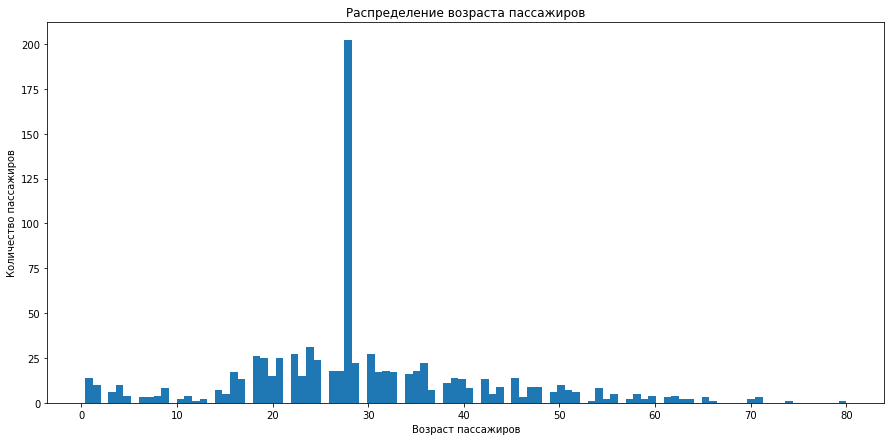

In [217]:
# Гистограммы построены для 5 вещественных признаков: Age, SibSp, Parch, Fare, Family
# Для PassengerId гистограмму не имеет смысла строить, так как это техническое поле, где все значения составляют уникальные номера (целые числа), начиная с 1 и с шагом 1

# Гистограмма распределения возраста пассажиров

data['Age'].plot.hist(figsize=(15, 7), bins=100, title='Распределение возраста пассажиров')
plt.xlabel('Возраст пассажиров')
plt.ylabel('Количество пассажиров')
plt.show()

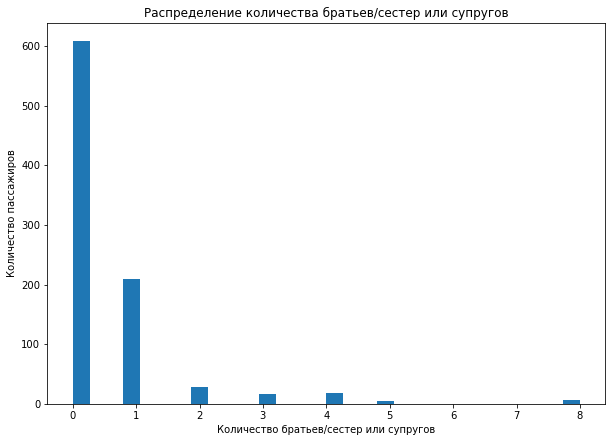

In [213]:
# Гистограмма распределения количества братьев/сестер или супругов пассажиров на борту

data['SibSp'].plot.hist(figsize=(10, 7), bins=30, title='Распределение количества братьев/сестер или супругов')
plt.xlabel('Количество братьев/сестер или супругов')
plt.ylabel('Количество пассажиров')
plt.show()

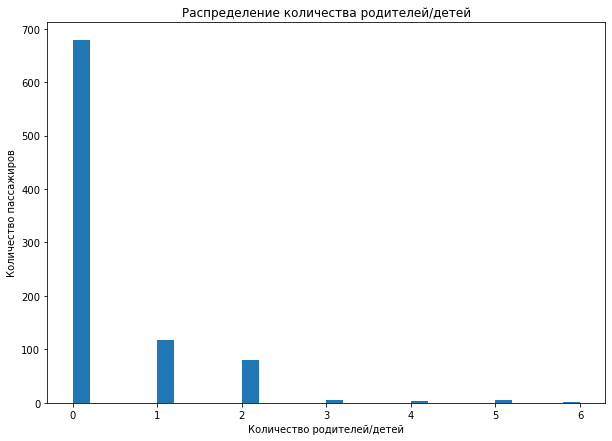

In [212]:
# Гистограмма распределения количества родителей/детей пассажиров на борту

data['Parch'].plot.hist(figsize=(10, 7), bins=30, title='Распределение количества родителей/детей')
plt.xlabel('Количество родителей/детей')
plt.ylabel('Количество пассажиров')
plt.show()

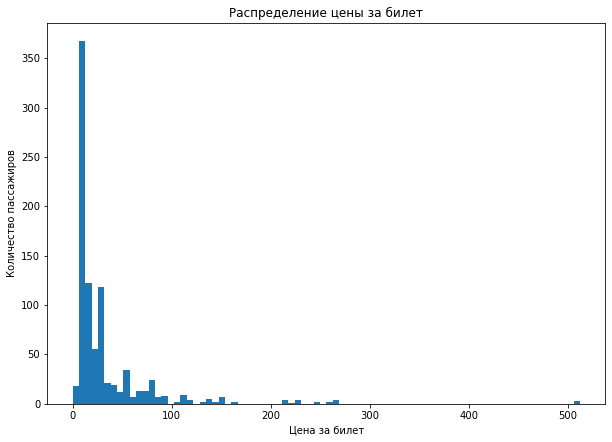

In [254]:
# Гистограмма распределения цен за билеты пассажиров

data['Fare'].plot.hist(figsize=(10, 7), bins=80, title='Распределение цены за билет')
plt.xlabel('Цена за билет')
plt.ylabel('Количество пассажиров')
plt.show()

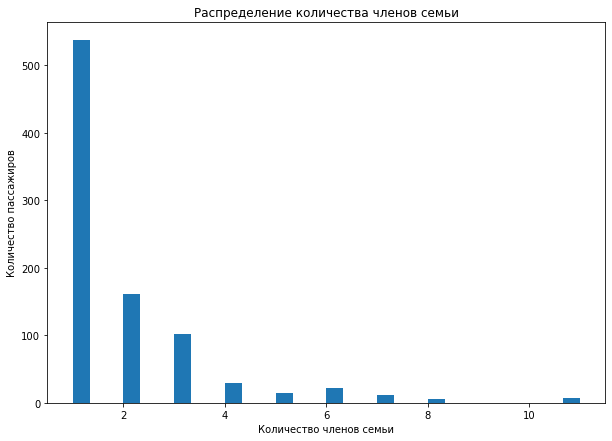

In [206]:
# Гистограмма распределения количества членов семьи пассажиров на борту 

data['Family'].plot.hist(figsize=(10, 7), bins=30, title='Распределение количества членов семьи')
plt.xlabel('Количество членов семьи'), plt.ylabel('Количество пассажиров')
plt.show()

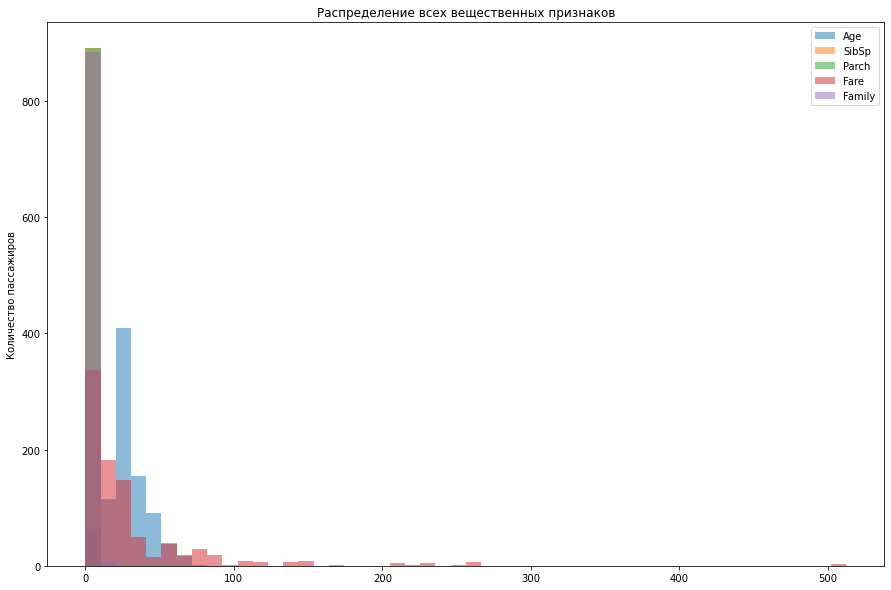

In [26]:
# Гистограмма распределения всех вещественных признаков

columns_new = ['Age', 'SibSp', 'Parch', 'Fare', 'Family']
data_new = data[columns_new]
data_new.plot.hist(figsize=(15, 10), bins=50, alpha=0.5, title='Распределение всех вещественных признаков')
plt.ylabel('Количество пассажиров')
plt.legend = columns_new
plt.show()

In [329]:
# Данные разноразмерные, их значения находятся в разных диапазонах), что плохо с точки зрения машинного обучения, так как может привести к неравномерному распределению весов
# Чтобы решить эту проблему, данные нужно нормализовать
# Ниже приведены 2 метода (способа) нормализации данных, выводы нормализованных данных и гистограммы с новыми данными

In [17]:
# Использование библиотеки
from sklearn import preprocessing

In [18]:
# Нормализация данных (1 способ)

data_normalized = pd.DataFrame(preprocessing.normalize(data_new), columns=columns_new)

# Альтернатива (для более удобного чтения):
# array_normalized = preprocessing.normalize(data_new)
# data_normalized = pd.DataFrame(array_normalized, columns=columns_new)

In [19]:
# Вывод нормализованных данных (1 способ)

data_normalized

,Age,SibSp,Parch,Fare,Family
0,0.945363,0.042971,0.000000,0.311540,0.085942
1,0.470237,0.012375,0.000000,0.882106,0.024749
2,0.955905,0.000000,0.000000,0.291367,0.036766
3,0.549998,0.015714,0.000000,0.834426,0.031428
4,0.974178,0.000000,0.000000,0.224061,0.027834
...,...,...,...,...,...
886,0.900500,0.000000,0.000000,0.433574,0.033352
887,0.534840,0.000000,0.000000,0.844484,0.028149
888,0.760684,0.027167,0.054335,0.637072,0.108669
889,0.654723,0.000000,0.000000,0.755449,0.025182


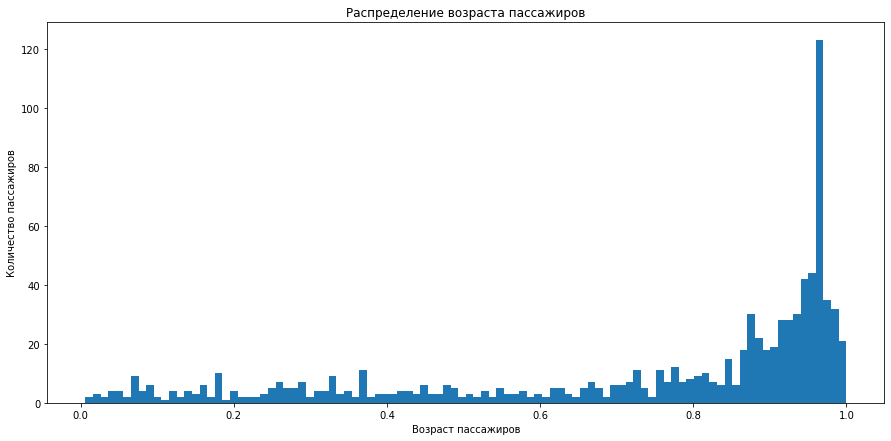

In [303]:
# Гистограмма распределения возраста пассажиров с нормализованными  (1 способ)

data_normalized['Age'].plot.hist(figsize=(15, 7), bins=100, title='Распределение возраста пассажиров')
plt.xlabel('Возраст пассажиров')
plt.ylabel('Количество пассажиров')
plt.show()

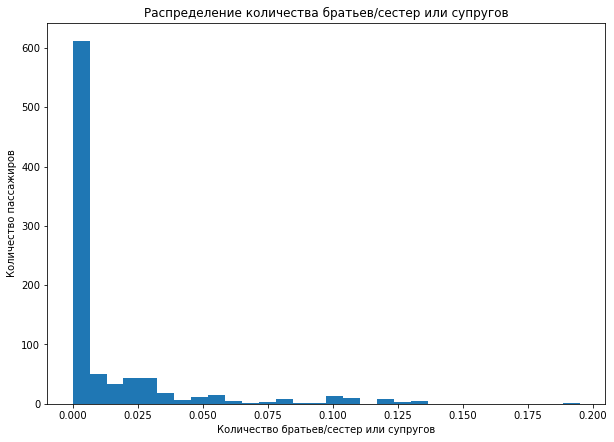

In [304]:
# Гистограмма распределения количества братьев/сестер или супругов пассажиров на борту с нормализованными данными (1 способ)

data_normalized['SibSp'].plot.hist(figsize=(10, 7), bins=30, title='Распределение количества братьев/сестер или супругов')
plt.xlabel('Количество братьев/сестер или супругов')
plt.ylabel('Количество пассажиров')
plt.show()

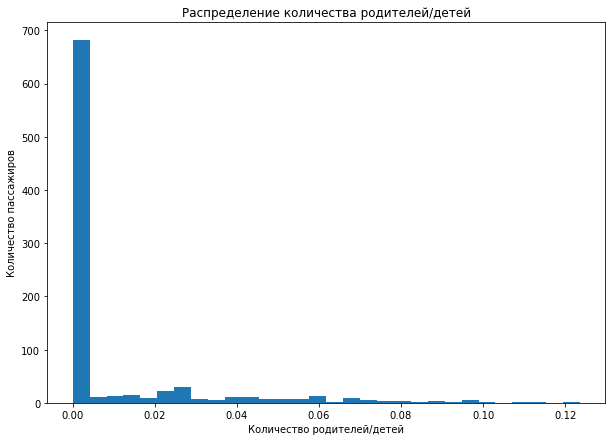

In [307]:
# Гистограмма распределения количества родителей/детей пассажиров на борту с нормализованными данными (1 способ)

data_normalized['Parch'].plot.hist(figsize=(10, 7), bins=30, title='Распределение количества родителей/детей')
plt.xlabel('Количество родителей/детей')
plt.ylabel('Количество пассажиров')
plt.show()

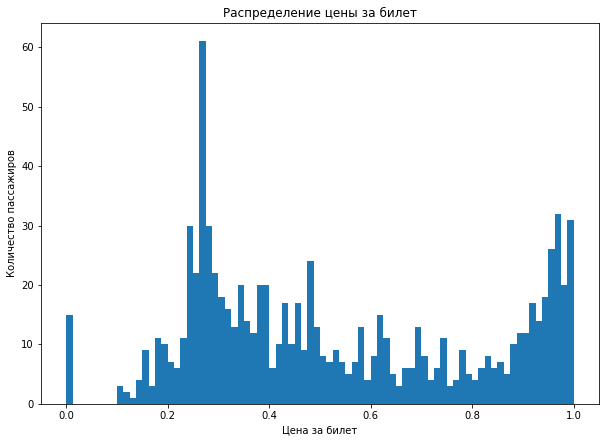

In [308]:
# Гистограмма распределения цен за билеты пассажиров с нормализованными данными (1 способ)

data_normalized['Fare'].plot.hist(figsize=(10, 7), bins=80, title='Распределение цены за билет')
plt.xlabel('Цена за билет')
plt.ylabel('Количество пассажиров')
plt.show()

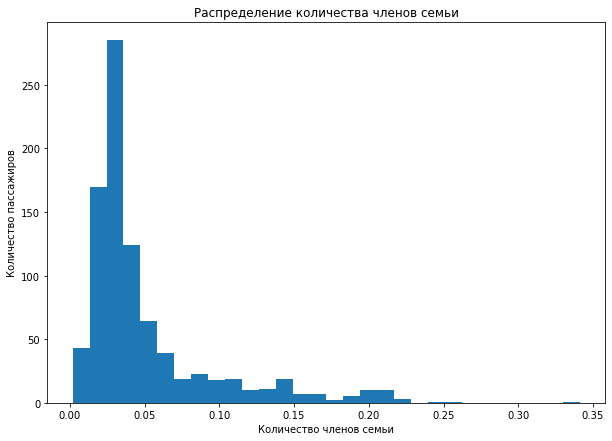

In [309]:
# Гистограмма распределения количества членов семьи пассажиров на борту с нормализованными данными (1 способ)

data_normalized['Family'].plot.hist(figsize=(10, 7), bins=30, title='Распределение количества членов семьи')
plt.xlabel('Количество членов семьи'), plt.ylabel('Количество пассажиров')
plt.show()

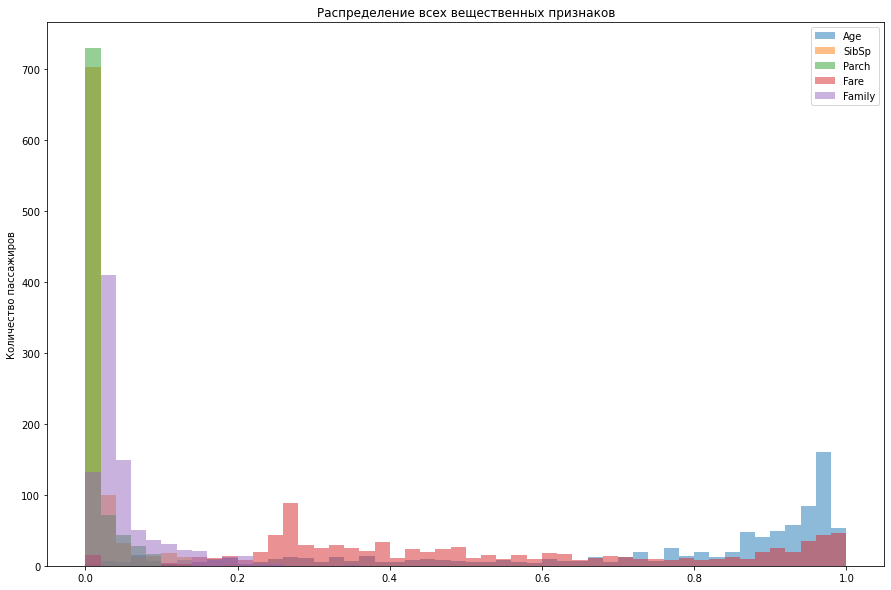

In [27]:
# Гистограмма распределения всех вещественных признаков с нормализованными данными (1 способ)


data_normalized.plot.hist(figsize=(15, 10), bins=50, alpha=0.5, title='Распределение всех вещественных признаков')
plt.ylabel('Количество пассажиров')
plt.legend = columns_new
plt.show()

In [21]:
# Нормализация данных (2 способ)

data_normalized_2 = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data_new), columns=columns_new)

# Альтернатива (для более удобного чтения):
# array_normalized_2 = preprocessing.MinMaxScaler().fit_transform(data_new)
# data_normalized_2 = pd.DataFrame(array_normalized, columns=columns_new)

In [22]:
# Вывод нормализованных данных (2 способ)

data_normalized_2

,Age,SibSp,Parch,Fare,Family
0,0.271174,0.125,0.000000,0.014151,0.1
1,0.472229,0.125,0.000000,0.139136,0.1
2,0.321438,0.000,0.000000,0.015469,0.0
3,0.434531,0.125,0.000000,0.103644,0.1
4,0.434531,0.000,0.000000,0.015713,0.0
...,...,...,...,...,...
886,0.334004,0.000,0.000000,0.025374,0.0
887,0.233476,0.000,0.000000,0.058556,0.0
888,0.346569,0.125,0.333333,0.045771,0.3
889,0.321438,0.000,0.000000,0.058556,0.0


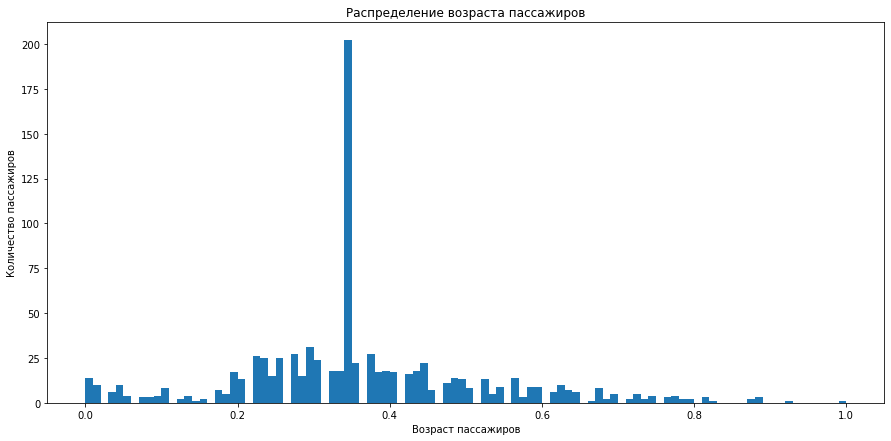

In [314]:
# Гистограмма распределения возраста пассажиров с нормализованными  (2 способ)

data_normalized_2['Age'].plot.hist(figsize=(15, 7), bins=100, title='Распределение возраста пассажиров')
plt.xlabel('Возраст пассажиров')
plt.ylabel('Количество пассажиров')
plt.show()

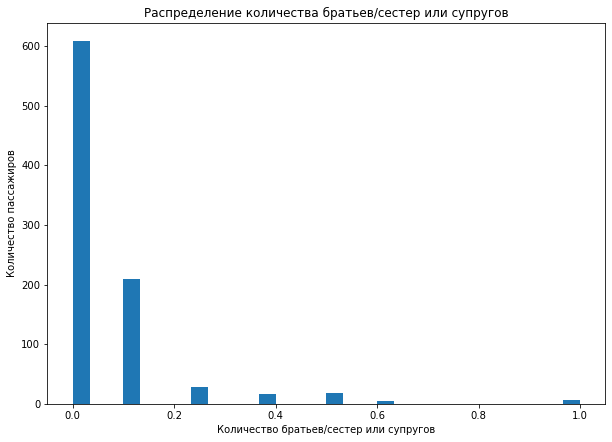

In [315]:
# Гистограмма распределения количества братьев/сестер или супругов пассажиров на борту с нормализованными данными (2 способ)

data_normalized_2['SibSp'].plot.hist(figsize=(10, 7), bins=30, title='Распределение количества братьев/сестер или супругов')
plt.xlabel('Количество братьев/сестер или супругов')
plt.ylabel('Количество пассажиров')
plt.show()

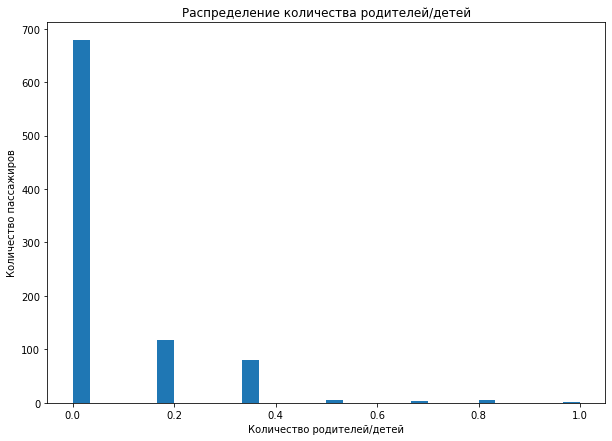

In [316]:
# Гистограмма распределения количества родителей/детей пассажиров на борту с нормализованными данными (2 способ)

data_normalized_2['Parch'].plot.hist(figsize=(10, 7), bins=30, title='Распределение количества родителей/детей')
plt.xlabel('Количество родителей/детей')
plt.ylabel('Количество пассажиров')
plt.show()

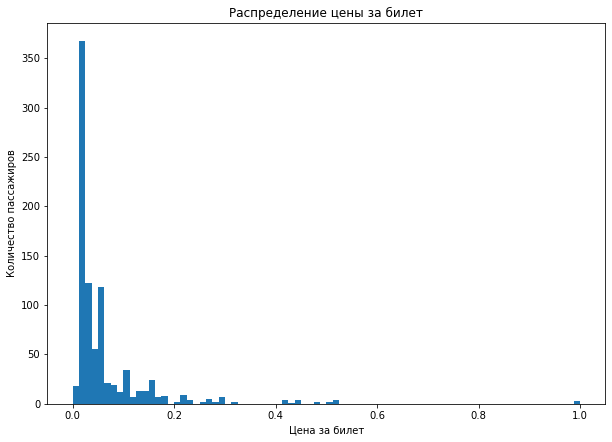

In [317]:
# Гистограмма распределения цен за билеты пассажиров с нормализованными данными (2 способ)

data_normalized_2['Fare'].plot.hist(figsize=(10, 7), bins=80, title='Распределение цены за билет')
plt.xlabel('Цена за билет')
plt.ylabel('Количество пассажиров')
plt.show()

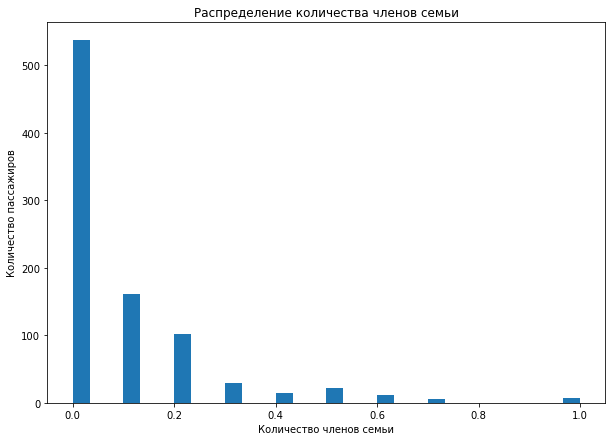

In [318]:
# Гистограмма распределения количества членов семьи пассажиров на борту с нормализованными данными (2 способ)

data_normalized_2['Family'].plot.hist(figsize=(10, 7), bins=30, title='Распределение количества членов семьи')
plt.xlabel('Количество членов семьи'), plt.ylabel('Количество пассажиров')
plt.show()

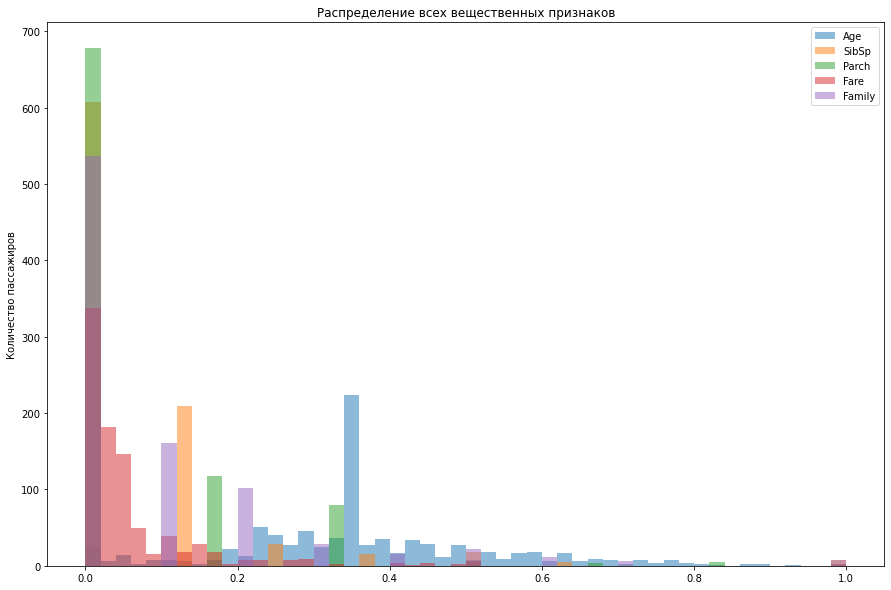

In [28]:
# Гистограмма распределения всех вещественных признаков с нормализованными данными (2 способ)


data_normalized_2.plot.hist(figsize=(15, 10), bins=50, alpha=0.5, title='Распределение всех вещественных признаков')
plt.ylabel('Количество пассажиров')
plt.legend = columns_new
plt.show()

In [ ]:
# Нормализация решает проблему большой разницы в масштабе данных, благодаря чему возможно использовать данные разных столбцов вместе без больших погрешностей
# Нормализация создает новые значения данных для числовых столбцов в пределах шкалы 0-1

### 24

Постройте столбчатую диаграмму с 2 столбцами (количество выживших и не выживших) в зависимости от количества родителей/детей на борту Титаника (поле parch). Какие выводы можно сделать?

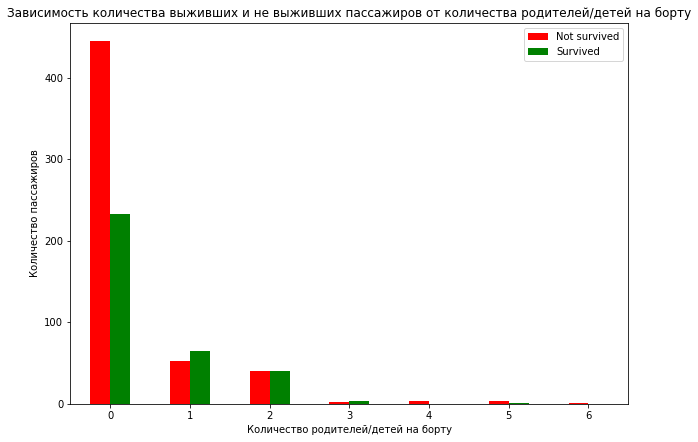

In [111]:
# Диаграмма, показывающая количество выживших и не выживших пассажиров в зависимости от количества родителей/детей на борту

df = data.groupby(['Parch', 'Survived'])['Survived'].aggregate('count').unstack().plot.bar(rot=0, figsize=(10,7), color=['red', 'green'])
plt.title('Зависимость количества выживших и не выживших пассажиров от количества родителей/детей на борту')
plt.xlabel('Количество родителей/детей на борту')
plt.ylabel('Количество пассажиров')
plt.legend(['Not survived', 'Survived'])
plt.show()

# На основе диаграммы можно сделать вывод, что больше всего как выживших, так и погибших пассажиров, не имели родителей/детей на борту, что может быть связано с тем, что таких людей большая часть.
# Также можно заметить, что выживших без родителей/детей почти в 2 раза меньше, чем погибших, а с 1 родителем/ребенком, наоборот, больше
# Выживших с 2 родителями/детьми примерно столько же, сколько и погибших
# Если смотреть отдельно на выживших и погибших, то доля пассажиров с родителями/детьми на борту среди выживших больше, чем доля погибших с родителями/детьми среди погибших
# Таким образом, вероятность выжить была больше у пассажиров с родителями/детьми на борту

### 25

Используя seaborn violinplot постройте распределение по возрасту (Age) выживших и не выживших пассажиров для каждого класса билета (pclass).

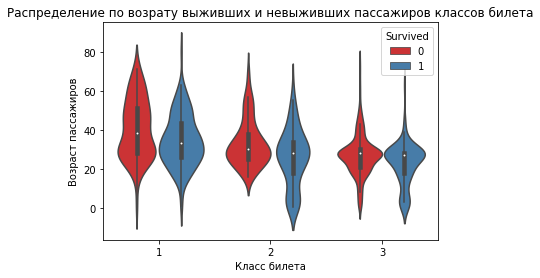

In [395]:
import seaborn as sns

ax = sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, palette='Set1')
ax.set_title('Распределение по возрату выживших и невыживших пассажиров классов билета')
ax.set_xlabel('Класс билета')
ax.set_ylabel('Возраст пассажиров')
plt.show()

### 26

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [30]:
# Кодирование пола пассажиров (изменение на 0 и 1)

data['Sex'] = data['Sex'].replace(['male', 'female'], [0, 1])

In [31]:
# Кодирование порта посадки (one hot encoding)
# Сохранение столбца

embarked = pd.get_dummies(data['Embarked'])

In [32]:
# Кодирование порта посадки (one hot encoding)
# Удаление столбца 

data.drop('Embarked', axis=1, inplace=True)

In [33]:
# Кодирование порта посадки (one hot encoding)
# Добавление новых столбцов

data = pd.concat((data, embarked), axis=1)

In [34]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,HasBigFamily,IsAdult,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,2,0,1,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,2,0,1,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,1,0,1,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,2,0,1,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1,0,1,0,0,1
887,888,1,1,1,19.0,0,0,30.0000,1,0,1,0,0,1
888,889,0,3,1,28.0,1,2,23.4500,4,1,1,0,0,1
889,890,1,1,0,26.0,0,0,30.0000,1,0,1,1,0,0
